In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import display, Markdown

**데이터 EDA**



**박스플롯에 사용한 평가지표 3가지 :**


**balance :**

Balance accuracy는 각 클래스에 대한 재현율(recall)의 평균으로 정의되는 지표로,
클래스 불균형 데이터에서 다수 클래스에 치우친 정확도의 한계를 보완하기 위해 사용된다.
값이 1에 가까울수록 모든 클래스에 대해 균형 잡힌 예측 성능을 의미하며,
0.5는 무작위 분류 수준의 성능을 나타낸다.

본 연구에서는 balance accuracy를 통해 stable 오버샘플링 기법이
소수 클래스와 다수 클래스를 동시에 고려한 분류 성능을 얼마나 개선하는지를 평가하였다.
특히, 기존 오버샘플링 기법 대비 stable 기법이
클래스 간 예측 편향을 완화하고 보다 균형 잡힌 분류 성능을 제공하는지에 초점을 두었다.

**auc :**

AUC(Area Under the ROC Curve)는 분류기의 임계값 변화에 따른
참양성률(True Positive Rate)과 거짓양성률(False Positive Rate) 간의 관계를 종합적으로 평가하는 지표로,
값이 1에 가까울수록 분류 성능이 우수함을 의미하며
0.5는 무작위 분류와 동일한 성능을 나타낸다.

본 연구에서는 AUC를 활용하여 stable 오버샘플링 기법이
분류 임계값에 덜 민감하면서도 전반적인 판별 능력을 향상시키는지를 분석하였다.
이를 통해 stable 오버샘플링 기법이 기존 방법 대비
보다 일관되고 신뢰도 높은 분류 성능을 제공하는지를 비교 평가하였다.

**MCC  :**

MCC(Matthews Correlation Coefficient)는 클래스 불균형 상황에서도 분류기의 전반적인 예측 성능을 균형 있게 평가할 수 있는 지표로,
값이 1에 가까울수록 예측이 완벽하며 0은 무작위 분류, 음수는 반대 방향의 예측을 의미한다.
본 연구에서는 MCC를 주요 성능 지표로 사용하여, stable 오버샘플링 기법이 기존 기법 대비 분류 성능을 얼마나 향상시키는지를 비교하였다.

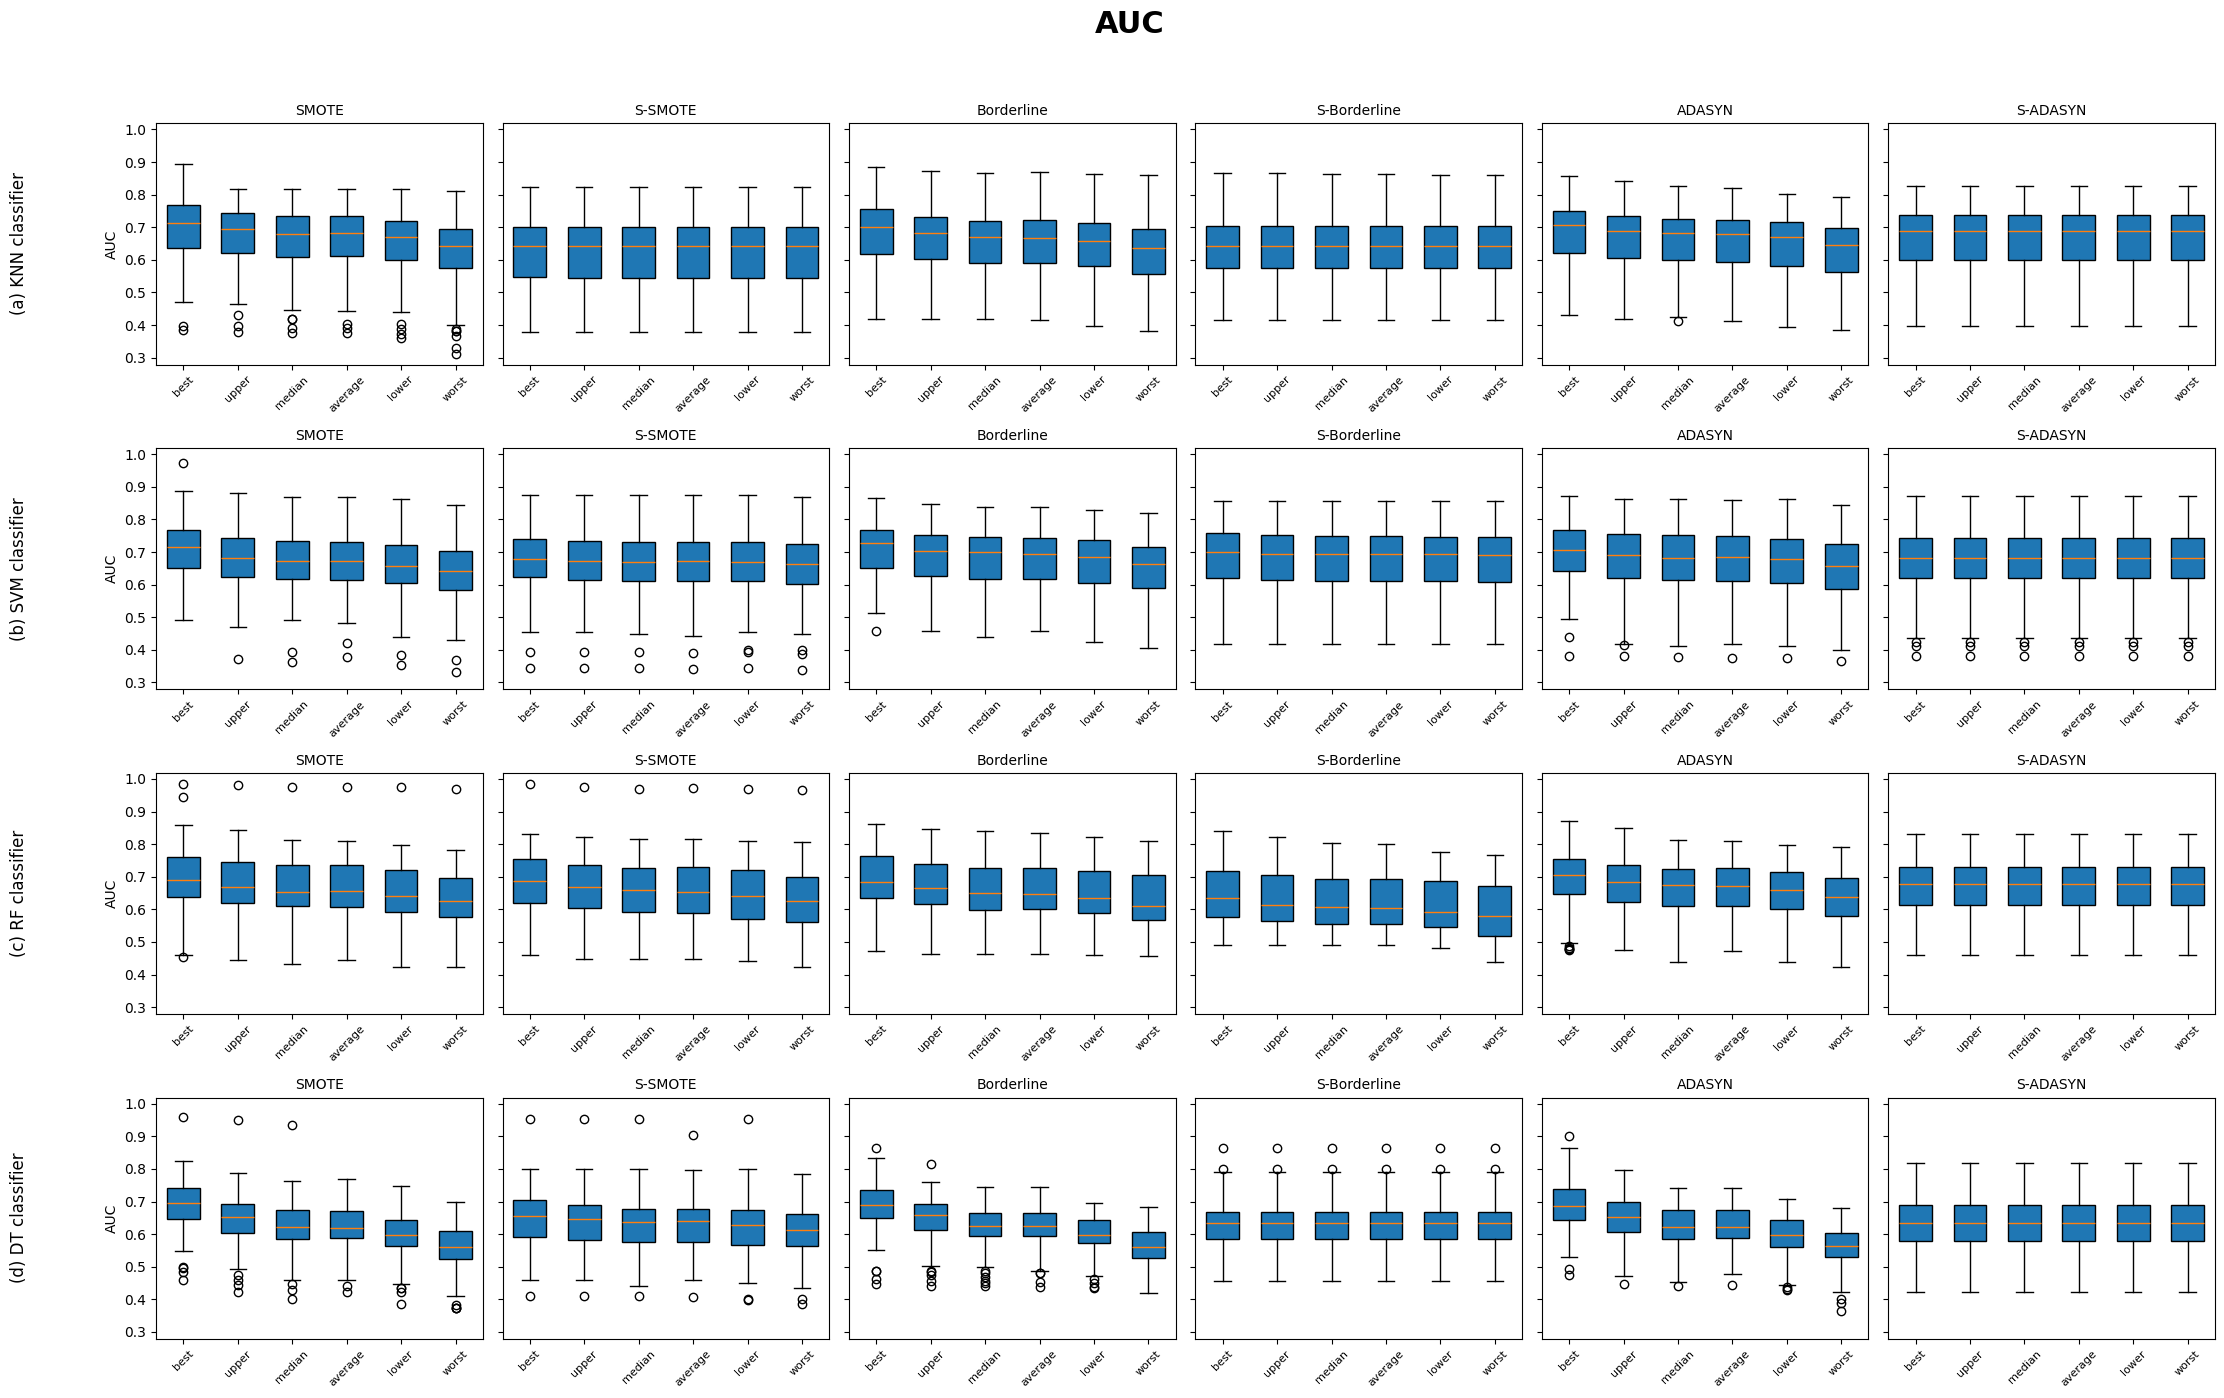

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# 기본 경로

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"

CLASSIFIERS = [
    ("knn",  "(a) KNN classifier"),
    ("svm",  "(b) SVM classifier"),
    ("rf",   "(c) RF classifier"),
    ("tree", "(d) DT classifier"),
]

SAMPLERS = [
    ("SMOTE",      "SMOTE"),
    ("SMOTE",      "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN",     "ADASYN"),
    ("ADASYN",     "S-ADASYN"),
]

# CSV 실제 컬럼 (논문 best → worst)
ORDER_COLS   = ["max", "upper", "median", "avg", "lower", "min"]
XTICK_LABELS = ["best", "upper", "median", "average", "lower", "worst"]


# Figure 생성

fig, axes = plt.subplots(
    nrows=4,
    ncols=6,
    figsize=(22, 14),
    sharey=True
)

for row_idx, (clf, clf_title) in enumerate(CLASSIFIERS):
    for col_idx, (sampler, title) in enumerate(SAMPLERS):

        ax = axes[row_idx, col_idx]
        folder_name = f"{sampler}_{clf}"
        folder_path = os.path.join(BASE_PATH, folder_name)

        # stable / non-stable 파일 선택
        if title.startswith("S-"):
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5auc_stable")][0]
        else:
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5auc_") and "stable" not in f][0]

        df = pd.read_csv(os.path.join(folder_path, csv_file))
        df = df.loc[:, ~df.columns.str.contains("Unnamed")]
        df_plot = df[ORDER_COLS].apply(pd.to_numeric, errors="coerce")

        ax.boxplot(
            [df_plot[c].dropna() for c in ORDER_COLS],
            patch_artist=True,
            widths=0.6
        )

        ax.set_title(title, fontsize=10)
        ax.set_xticklabels(XTICK_LABELS, rotation=45, fontsize=8)

        if col_idx == 0:
            ax.set_ylabel("AUC", fontsize=10)

    # row 중앙에 classifier 이름 (좌측)
    axes[row_idx, 0].annotate(
        clf_title,
        xy=(-0.42, 0.5),
        xycoords="axes fraction",
        rotation=90,
        fontsize=12,
        va="center",
        ha="center"
    )


# 전체 제목 (맨 위 AUC)

fig.suptitle(
    "AUC",
    fontsize=22,
    fontweight="bold",
    y=0.995
)

# 레이아웃 정리 (제목 공간 확보)
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()


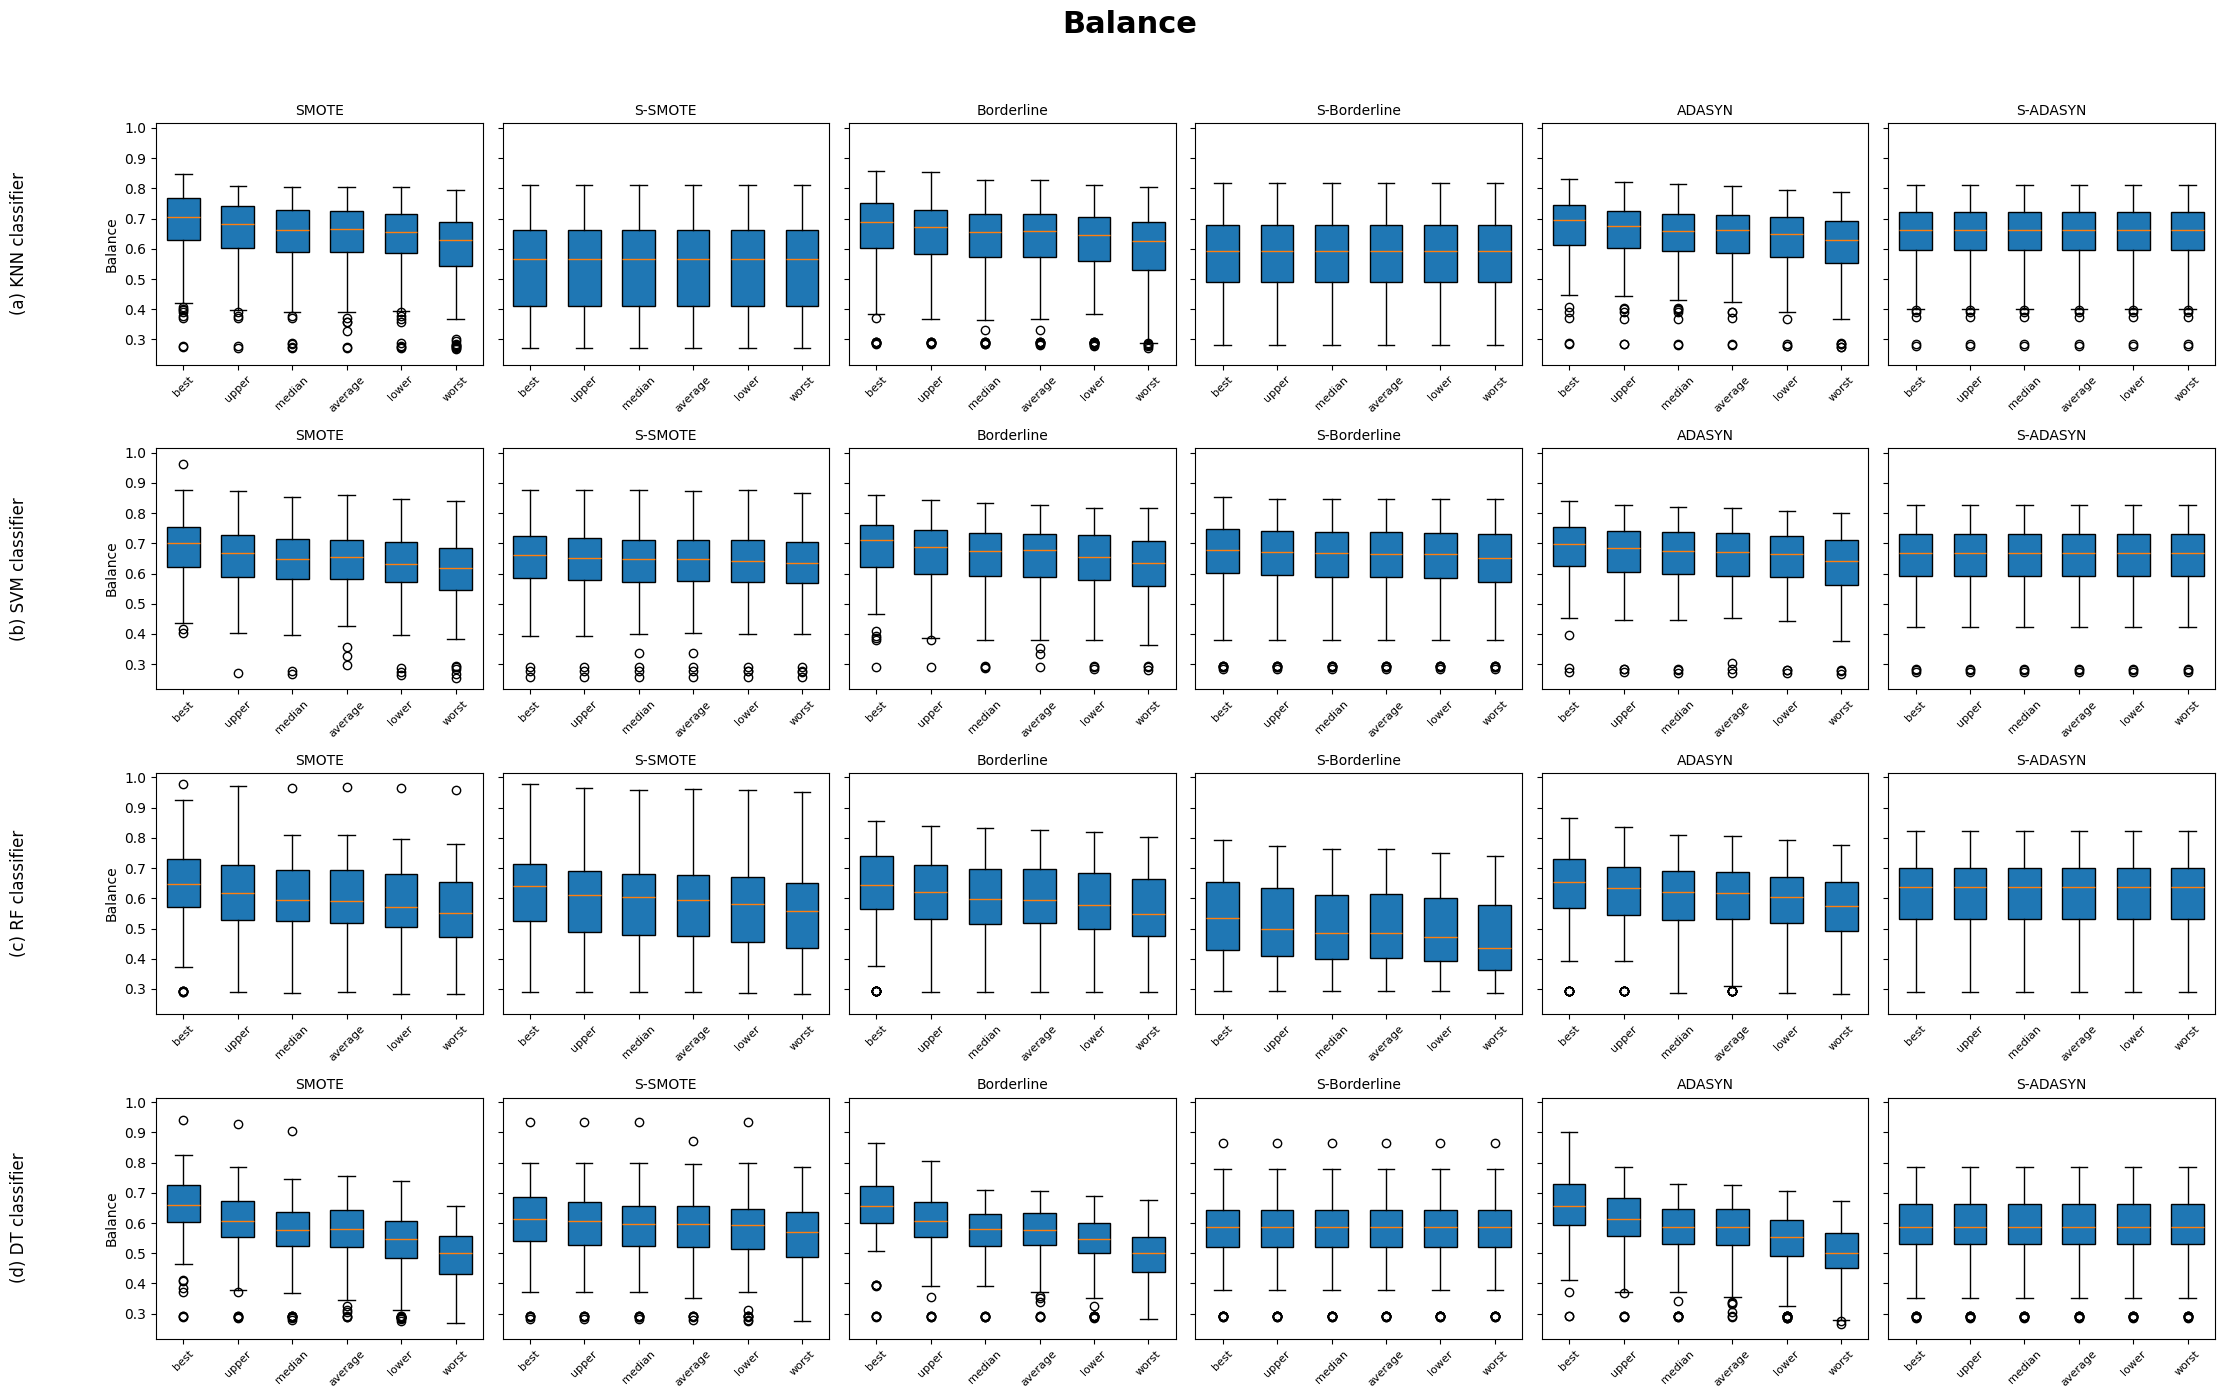

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# 기본 경로

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"

CLASSIFIERS = [
    ("knn",  "(a) KNN classifier"),
    ("svm",  "(b) SVM classifier"),
    ("rf",   "(c) RF classifier"),
    ("tree", "(d) DT classifier"),
]

SAMPLERS = [
    ("SMOTE",      "SMOTE"),
    ("SMOTE",      "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN",     "ADASYN"),
    ("ADASYN",     "S-ADASYN"),
]

# CSV 실제 컬럼 (best → worst)
ORDER_COLS   = ["max", "upper", "median", "avg", "lower", "min"]
XTICK_LABELS = ["best", "upper", "median", "average", "lower", "worst"]


# Figure 생성

fig, axes = plt.subplots(
    nrows=4,
    ncols=6,
    figsize=(22, 14),
    sharey=True
)

for row_idx, (clf, clf_title) in enumerate(CLASSIFIERS):
    for col_idx, (sampler, title) in enumerate(SAMPLERS):

        ax = axes[row_idx, col_idx]
        folder_name = f"{sampler}_{clf}"
        folder_path = os.path.join(BASE_PATH, folder_name)

        # stable / non-stable 파일 선택 (balance)
        if title.startswith("S-"):
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5balance_stable")][0]
        else:
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5balance_") and "stable" not in f][0]

        df = pd.read_csv(os.path.join(folder_path, csv_file))
        df = df.loc[:, ~df.columns.str.contains("Unnamed")]
        df_plot = df[ORDER_COLS].apply(pd.to_numeric, errors="coerce")

        ax.boxplot(
            [df_plot[c].dropna() for c in ORDER_COLS],
            patch_artist=True,
            widths=0.6
        )

        ax.set_title(title, fontsize=10)
        ax.set_xticklabels(XTICK_LABELS, rotation=45, fontsize=8)

        if col_idx == 0:
            ax.set_ylabel("Balance", fontsize=10)

    # classifier 이름 (좌측 중앙)
    axes[row_idx, 0].annotate(
        clf_title,
        xy=(-0.42, 0.5),
        xycoords="axes fraction",
        rotation=90,
        fontsize=12,
        va="center",
        ha="center"
    )


# 전체 제목

fig.suptitle(
    "Balance",
    fontsize=22,
    fontweight="bold",
    y=0.995
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


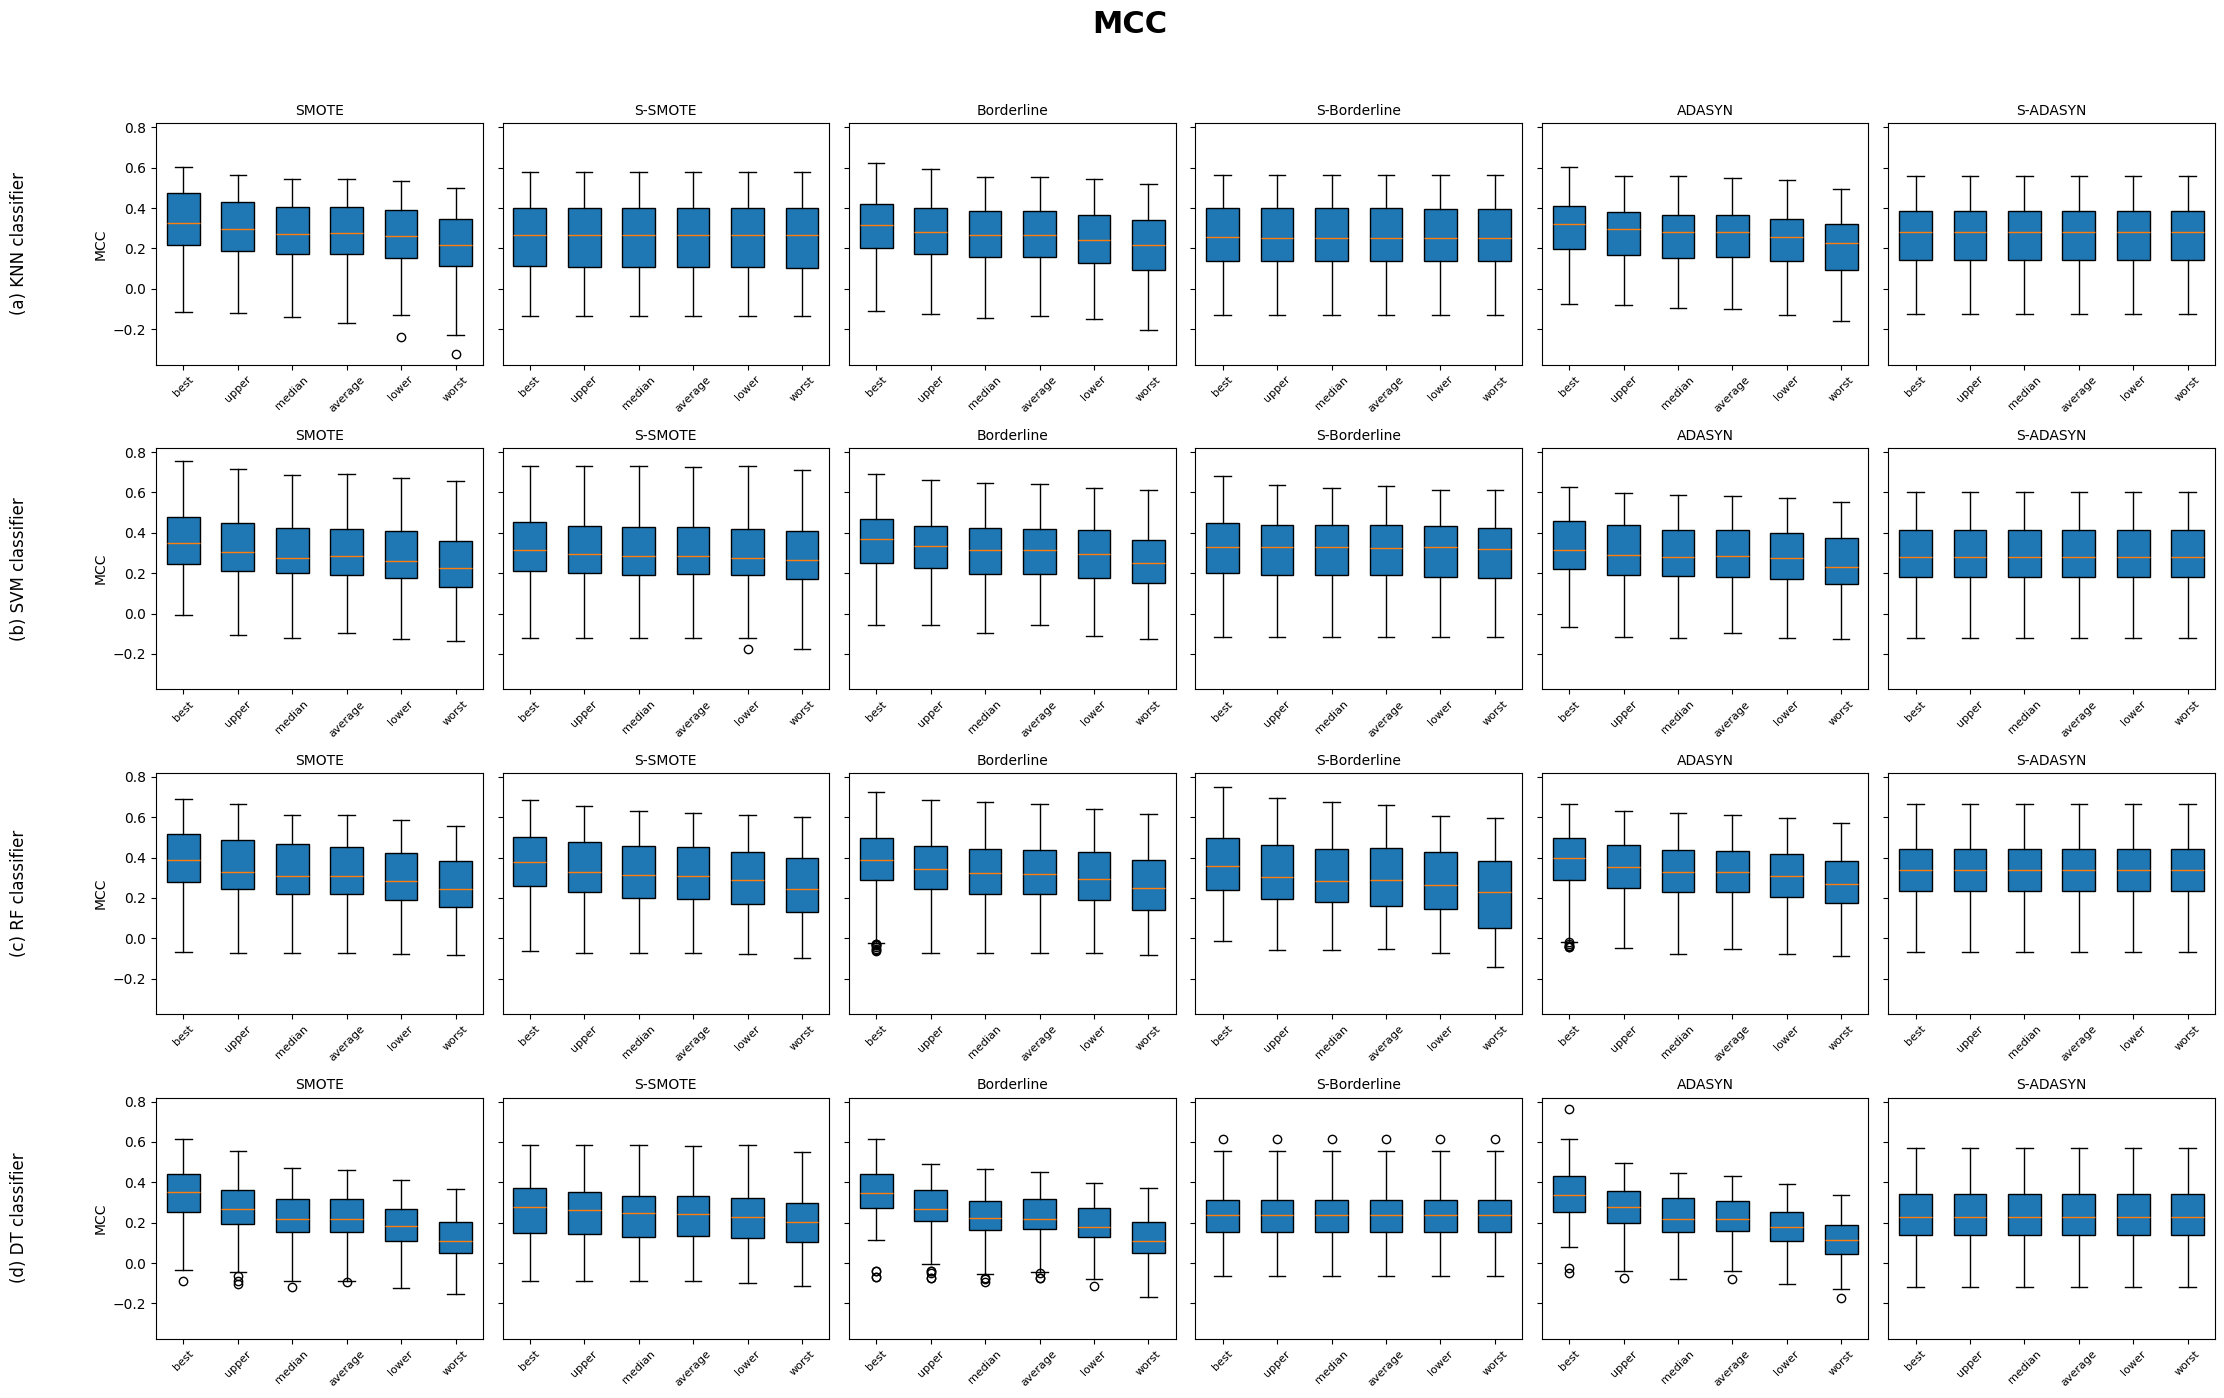

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# 기본 경로

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"

CLASSIFIERS = [
    ("knn",  "(a) KNN classifier"),
    ("svm",  "(b) SVM classifier"),
    ("rf",   "(c) RF classifier"),
    ("tree", "(d) DT classifier"),
]

SAMPLERS = [
    ("SMOTE",      "SMOTE"),
    ("SMOTE",      "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN",     "ADASYN"),
    ("ADASYN",     "S-ADASYN"),
]

# CSV 실제 컬럼 (best → worst)
ORDER_COLS   = ["max", "upper", "median", "avg", "lower", "min"]
XTICK_LABELS = ["best", "upper", "median", "average", "lower", "worst"]


# Figure 생성

fig, axes = plt.subplots(
    nrows=4,
    ncols=6,
    figsize=(22, 14),
    sharey=True
)

for row_idx, (clf, clf_title) in enumerate(CLASSIFIERS):
    for col_idx, (sampler, title) in enumerate(SAMPLERS):

        ax = axes[row_idx, col_idx]
        folder_name = f"{sampler}_{clf}"
        folder_path = os.path.join(BASE_PATH, folder_name)

        # stable / non-stable 파일 선택 (MCC)
        if title.startswith("S-"):
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5mcc_stable")][0]
        else:
            csv_file = [f for f in os.listdir(folder_path)
                        if f.startswith("5mcc_") and "stable" not in f][0]

        df = pd.read_csv(os.path.join(folder_path, csv_file))
        df = df.loc[:, ~df.columns.str.contains("Unnamed")]
        df_plot = df[ORDER_COLS].apply(pd.to_numeric, errors="coerce")

        ax.boxplot(
            [df_plot[c].dropna() for c in ORDER_COLS],
            patch_artist=True,
            widths=0.6
        )

        ax.set_title(title, fontsize=10)
        ax.set_xticklabels(XTICK_LABELS, rotation=45, fontsize=8)

        if col_idx == 0:
            ax.set_ylabel("MCC", fontsize=10)

    # classifier 이름 (좌측 중앙)
    axes[row_idx, 0].annotate(
        clf_title,
        xy=(-0.42, 0.5),
        xycoords="axes fraction",
        rotation=90,
        fontsize=12,
        va="center",
        ha="center"
    )


# 전체 제목

fig.suptitle(
    "MCC",
    fontsize=22,
    fontweight="bold",
    y=0.995
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**테이블에 사용된 평가지표 5가지 :**


**MCC  :**

MCC(Matthews Correlation Coefficient)는 클래스 불균형 상황에서도 분류기의 전반적인 예측 성능을 균형 있게 평가할 수 있는 지표로,
값이 1에 가까울수록 예측이 완벽하며 0은 무작위 분류, 음수는 반대 방향의 예측을 의미한다.
본 연구에서는 MCC를 주요 성능 지표로 사용하여, stable 오버샘플링 기법이 기존 기법 대비 분류 성능을 얼마나 향상시키는지를 비교하였다.

**var  :**

분산(var)은 반복 실험 간 성능 변동성을 나타내는 지표로, 값이 낮을수록 모델 성능이 실험 조건 변화에 덜 민감하며 안정적임을 의미한다.
본 연구에서는 MCC의 분산을 통해 오버샘플링 기법 적용 시 분류기의 성능 안정성과 강건성을 평가하였으며,
특히 stable 오버샘플링 기법이 기존 방법 대비 분산을 효과적으로 감소시키는지를 중점적으로 분석하였다.


**W/D/L  :**

W/D/L 결과, 전반적으로 stable 오버샘플링 기법을 적용한 경우
MCC 측면에서 더 많은 승(W)을 기록하여 분류 성능이 향상되는 경향을 보였다.
반면, 분산(var) 측면에서는 패(L)의 수가 현저히 적어,
stable 오버샘플링 기법이 기존 방법에 비해 더 낮은 분산을 유지하며
보다 강건한 성능을 제공함을 확인할 수 있다

**p-value  :**

p-value는 stable 오버샘플링 기법과 기존 오버샘플링 기법 간의 성능 차이가 통계적으로 유의한지를 검증하기 위해 사용됨.
실험 결과, SMOTE, Borderline, ADASYN의 세 쌍 모두에서 p-value가 0.05 미만으로 나타나,
stable 오버샘플링 기법과 기존 방법 간의 차이가 통계적으로 유의함을 확인할 수 있다

**Cliff’s δ  :**

Cliff’s δ는 stable 오버샘플링 기법과 기존 오버샘플링 기법 간의 효과 크기를 측정한 지표임
본 실험에서 MCC에 대한 Cliff’s δ 값은 약 0.05 수준으로, 성능 향상은 통계적으로 유의하지만 효과 크기는 상대적으로 작음을 의미한다
반면, 분산(var)에 대한 Cliff’s δ 값은 0.9 이상으로 매우 크게 나타났으며, 이는 stable 오버샘플링 기법이 대부분의 데이터셋에서 기존 기법 대비 분산을 일관되게 감소시켰음을 의미한다

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

display(Markdown("# KNN"))

# 기본 설정

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"
CLASSIFIER = "knn"      # knn / svm / rf / tree
METRIC = "mcc"          # mcc / auc / balance

SAMPLERS = [
    ("SMOTE", "SMOTE"),
    ("SMOTE", "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN", "ADASYN"),
    ("ADASYN", "S-ADASYN"),
]

tables = []


# sampler별 집계

for sampler, sampler_name in SAMPLERS:

    folder = f"{sampler}_{CLASSIFIER}"
    folder_path = os.path.join(BASE_PATH, folder)

    if sampler_name.startswith("S-"):
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_stable")][0]
    else:
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_") and "stable" not in f][0]

    df = pd.read_csv(os.path.join(folder_path, csv_file))
    df.columns = df.columns.str.strip()

    # dataset 추출
    df["dataset"] = (
        df["inputfile"]
        .astype(str)
        .str.split(".csv")
        .str[0]
    )

    # dataset 기준 평균
    summary = (
        df.groupby("dataset")
          .agg(
              MCC=("avg", "mean"),
              var=("variance", "mean")
          )
          .round(3)
          .reset_index()
    )

    summary = summary.rename(columns={
        "MCC": f"{sampler_name}_MCC",
        "var": f"{sampler_name}_var"
    })

    tables.append(summary)


# 테이블 병합

final_table = tables[0]
for t in tables[1:]:
    final_table = final_table.merge(t, on="dataset")


# average 행 추가

avg_row = {"dataset": "average"}
for col in final_table.columns:
    if col != "dataset":
        avg_row[col] = round(final_table[col].mean(), 3)

final_table = pd.concat(
    [final_table, pd.DataFrame([avg_row])],
    ignore_index=True
)


# 컬럼 순서

ordered_cols = ["dataset"]
for _, name in SAMPLERS:
    ordered_cols += [f"{name}_MCC", f"{name}_var"]

final_table = final_table[ordered_cols]


#  논문 하단 통계 (W/D/L, p-value, Cliff's δ)


def compute_wdl(x, y, higher_is_better=True):
    W = D = L = 0
    for a, b in zip(x, y):
        if np.isnan(a) or np.isnan(b):
            continue
        if higher_is_better:
            if b > a:
                W += 1
            elif b < a:
                L += 1
            else:
                D += 1
        else:
            if b < a:
                W += 1
            elif b > a:
                L += 1
            else:
                D += 1
    return f"{W}/{D}/{L}"

def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    gt = sum(np.sum(xi > y) for xi in x)
    lt = sum(np.sum(xi < y) for xi in x)
    return round((gt - lt) / (len(x) * len(y)), 3)

# average 제외
df_stat = final_table[final_table["dataset"] != "average"]

pairs = [
    ("SMOTE", "S-SMOTE"),
    ("Borderline", "S-Borderline"),
    ("ADASYN", "S-ADASYN"),
]

# 빈 row 초기화 (컬럼 수 맞춤)
wdl_row = {col: "" for col in final_table.columns}
pval_row = {col: "" for col in final_table.columns}
cliff_row = {col: "" for col in final_table.columns}

wdl_row["dataset"] = "W/D/L"
pval_row["dataset"] = "p-value"
cliff_row["dataset"] = "Cliff's δ"

for base, stable in pairs:


    # MCC

    b_mcc = df_stat[f"{base}_MCC"]
    s_mcc = df_stat[f"{stable}_MCC"]

    wdl = compute_wdl(b_mcc, s_mcc, higher_is_better=True)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_MCC"] = wdl
    wdl_row[f"{stable}_MCC"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_mcc, b_mcc)
        pval_row[f"{stable}_MCC"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_MCC"] = "> .05"

    cliff_row[f"{stable}_MCC"] = abs(cliffs_delta(s_mcc, b_mcc))


    # var

    b_var = df_stat[f"{base}_var"]
    s_var = df_stat[f"{stable}_var"]

    wdl = compute_wdl(b_var, s_var, higher_is_better=False)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_var"] = wdl
    wdl_row[f"{stable}_var"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_var, b_var)
        pval_row[f"{stable}_var"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_var"] = "> .05"

    cliff_row[f"{stable}_var"] = abs(cliffs_delta(s_var, b_var))


# 최종 테이블 결합

final_table = pd.concat(
    [
        final_table,
        pd.DataFrame([wdl_row, pval_row, cliff_row])
    ],
    ignore_index=True
)

final_table

# KNN

,dataset,SMOTE_MCC,SMOTE_var,S-SMOTE_MCC,S-SMOTE_var,Borderline_MCC,Borderline_var,S-Borderline_MCC,S-Borderline_var,ADASYN_MCC,ADASYN_var,S-ADASYN_MCC,S-ADASYN_var
0,ant-1.3,0.305,0.051,0.335,0.0,0.271,0.058,0.274,0.0,0.276,0.045,0.265,0.0
1,ant-1.4,0.005,0.068,-0.034,0.0,0.045,0.052,0.056,0.0,0.036,0.054,0.071,0.0
2,ant-1.5,0.316,0.029,0.301,0.0,0.307,0.034,0.291,0.0,0.366,0.027,0.355,0.0
3,ant-1.6,0.441,0.036,0.395,0.0,0.407,0.03,0.387,0.002,0.433,0.031,0.474,0.0
4,ant-1.7,0.39,0.029,0.37,0.0,0.36,0.019,0.353,0.0,0.355,0.021,0.362,0.0
5,camel-1.0,0.086,0.038,0.078,0.0,0.086,0.015,0.063,0.0,0.092,0.026,0.099,0.0
6,camel-1.2,0.189,0.031,0.177,0.001,0.172,0.029,0.175,0.0,0.165,0.027,0.166,0.0
7,camel-1.4,0.163,0.024,0.096,0.0,0.128,0.023,0.161,0.0,0.138,0.02,0.154,0.0
8,camel-1.6,0.235,0.027,0.12,0.0,0.229,0.023,0.138,0.0,0.229,0.021,0.238,0.0
9,ivy-1.4,-0.022,0.023,-0.029,0.001,-0.009,0.029,-0.012,0.0,0.017,0.018,0.025,0.0


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
display(Markdown("# SVM"))

# 기본 설정

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"
CLASSIFIER = "svm"      # knn / svm / rf / tree
METRIC = "mcc"          # mcc / auc / balance

SAMPLERS = [
    ("SMOTE", "SMOTE"),
    ("SMOTE", "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN", "ADASYN"),
    ("ADASYN", "S-ADASYN"),
]

tables = []


# sampler별 집계

for sampler, sampler_name in SAMPLERS:

    folder = f"{sampler}_{CLASSIFIER}"
    folder_path = os.path.join(BASE_PATH, folder)

    if sampler_name.startswith("S-"):
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_stable")][0]
    else:
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_") and "stable" not in f][0]

    df = pd.read_csv(os.path.join(folder_path, csv_file))
    df.columns = df.columns.str.strip()

    # dataset 추출
    df["dataset"] = (
        df["inputfile"]
        .astype(str)
        .str.split(".csv")
        .str[0]
    )

    # dataset 기준 평균
    summary = (
        df.groupby("dataset")
          .agg(
              MCC=("avg", "mean"),
              var=("variance", "mean")
          )
          .round(3)
          .reset_index()
    )

    summary = summary.rename(columns={
        "MCC": f"{sampler_name}_MCC",
        "var": f"{sampler_name}_var"
    })

    tables.append(summary)


# 테이블 병합

final_table = tables[0]
for t in tables[1:]:
    final_table = final_table.merge(t, on="dataset")


# average 행 추가

avg_row = {"dataset": "average"}
for col in final_table.columns:
    if col != "dataset":
        avg_row[col] = round(final_table[col].mean(), 3)

final_table = pd.concat(
    [final_table, pd.DataFrame([avg_row])],
    ignore_index=True
)


# 컬럼 순서

ordered_cols = ["dataset"]
for _, name in SAMPLERS:
    ordered_cols += [f"{name}_MCC", f"{name}_var"]

final_table = final_table[ordered_cols]


#  논문 하단 통계 (W/D/L, p-value, Cliff's δ)


def compute_wdl(x, y, higher_is_better=True):
    W = D = L = 0
    for a, b in zip(x, y):
        if np.isnan(a) or np.isnan(b):
            continue
        if higher_is_better:
            if b > a:
                W += 1
            elif b < a:
                L += 1
            else:
                D += 1
        else:
            if b < a:
                W += 1
            elif b > a:
                L += 1
            else:
                D += 1
    return f"{W}/{D}/{L}"

def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    gt = sum(np.sum(xi > y) for xi in x)
    lt = sum(np.sum(xi < y) for xi in x)
    return round((gt - lt) / (len(x) * len(y)), 3)

# average 제외
df_stat = final_table[final_table["dataset"] != "average"]

pairs = [
    ("SMOTE", "S-SMOTE"),
    ("Borderline", "S-Borderline"),
    ("ADASYN", "S-ADASYN"),
]

# 빈 row 초기화 (컬럼 수 맞춤)
wdl_row = {col: "" for col in final_table.columns}
pval_row = {col: "" for col in final_table.columns}
cliff_row = {col: "" for col in final_table.columns}

wdl_row["dataset"] = "W/D/L"
pval_row["dataset"] = "p-value"
cliff_row["dataset"] = "Cliff's δ"

for base, stable in pairs:


    # MCC

    b_mcc = df_stat[f"{base}_MCC"]
    s_mcc = df_stat[f"{stable}_MCC"]

    wdl = compute_wdl(b_mcc, s_mcc, higher_is_better=True)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_MCC"] = wdl
    wdl_row[f"{stable}_MCC"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_mcc, b_mcc)
        pval_row[f"{stable}_MCC"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_MCC"] = "> .05"

    cliff_row[f"{stable}_MCC"] = abs(cliffs_delta(s_mcc, b_mcc))


    # var

    b_var = df_stat[f"{base}_var"]
    s_var = df_stat[f"{stable}_var"]

    wdl = compute_wdl(b_var, s_var, higher_is_better=False)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_var"] = wdl
    wdl_row[f"{stable}_var"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_var, b_var)
        pval_row[f"{stable}_var"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_var"] = "> .05"

    cliff_row[f"{stable}_var"] = abs(cliffs_delta(s_var, b_var))


# 최종 테이블 결합

final_table = pd.concat(
    [
        final_table,
        pd.DataFrame([wdl_row, pval_row, cliff_row])
    ],
    ignore_index=True
)

final_table

# SVM

,dataset,SMOTE_MCC,SMOTE_var,S-SMOTE_MCC,S-SMOTE_var,Borderline_MCC,Borderline_var,S-Borderline_MCC,S-Borderline_var,ADASYN_MCC,ADASYN_var,S-ADASYN_MCC,S-ADASYN_var
0,ant-1.3,0.244,0.068,0.203,0.034,0.322,0.056,0.356,0.002,0.283,0.031,0.296,0.0
1,ant-1.4,0.234,0.06,0.236,0.026,0.156,0.039,0.143,0.013,0.155,0.037,0.203,0.0
2,ant-1.5,0.259,0.033,0.256,0.004,0.329,0.023,0.338,0.002,0.257,0.03,0.241,0.0
3,ant-1.6,0.453,0.028,0.458,0.01,0.443,0.03,0.459,0.011,0.431,0.024,0.443,0.0
4,ant-1.7,0.441,0.021,0.436,0.012,0.439,0.024,0.444,0.007,0.362,0.016,0.35,0.0
5,camel-1.0,0.096,0.031,0.095,0.001,0.164,0.023,0.169,0.0,0.088,0.022,0.085,0.0
6,camel-1.2,0.203,0.034,0.218,0.023,0.193,0.029,0.198,0.017,0.185,0.027,0.18,0.0
7,camel-1.4,0.215,0.022,0.205,0.008,0.199,0.024,0.206,0.006,0.208,0.019,0.201,0.0
8,camel-1.6,0.254,0.021,0.262,0.01,0.239,0.025,0.218,0.007,0.204,0.014,0.19,0.0
9,ivy-1.4,0.073,0.043,0.045,0.012,0.094,0.046,0.011,0.0,0.092,0.033,0.1,0.0


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
display(Markdown("# RF"))

# 기본 설정

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"
CLASSIFIER = "rf"      # knn / svm / rf / tree
METRIC = "mcc"          # mcc / auc / balance

SAMPLERS = [
    ("SMOTE", "SMOTE"),
    ("SMOTE", "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN", "ADASYN"),
    ("ADASYN", "S-ADASYN"),
]

tables = []


# sampler별 집계

for sampler, sampler_name in SAMPLERS:

    folder = f"{sampler}_{CLASSIFIER}"
    folder_path = os.path.join(BASE_PATH, folder)

    if sampler_name.startswith("S-"):
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_stable")][0]
    else:
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_") and "stable" not in f][0]

    df = pd.read_csv(os.path.join(folder_path, csv_file))
    df.columns = df.columns.str.strip()

    # dataset 추출
    df["dataset"] = (
        df["inputfile"]
        .astype(str)
        .str.split(".csv")
        .str[0]
    )

    # dataset 기준 평균
    summary = (
        df.groupby("dataset")
          .agg(
              MCC=("avg", "mean"),
              var=("variance", "mean")
          )
          .round(3)
          .reset_index()
    )

    summary = summary.rename(columns={
        "MCC": f"{sampler_name}_MCC",
        "var": f"{sampler_name}_var"
    })

    tables.append(summary)


# 테이블 병합

final_table = tables[0]
for t in tables[1:]:
    final_table = final_table.merge(t, on="dataset")


# average 행 추가

avg_row = {"dataset": "average"}
for col in final_table.columns:
    if col != "dataset":
        avg_row[col] = round(final_table[col].mean(), 3)

final_table = pd.concat(
    [final_table, pd.DataFrame([avg_row])],
    ignore_index=True
)


# 컬럼 순서

ordered_cols = ["dataset"]
for _, name in SAMPLERS:
    ordered_cols += [f"{name}_MCC", f"{name}_var"]

final_table = final_table[ordered_cols]


#  논문 하단 통계 (W/D/L, p-value, Cliff's δ)


def compute_wdl(x, y, higher_is_better=True):
    W = D = L = 0
    for a, b in zip(x, y):
        if np.isnan(a) or np.isnan(b):
            continue
        if higher_is_better:
            if b > a:
                W += 1
            elif b < a:
                L += 1
            else:
                D += 1
        else:
            if b < a:
                W += 1
            elif b > a:
                L += 1
            else:
                D += 1
    return f"{W}/{D}/{L}"

def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    gt = sum(np.sum(xi > y) for xi in x)
    lt = sum(np.sum(xi < y) for xi in x)
    return round((gt - lt) / (len(x) * len(y)), 3)

# average 제외
df_stat = final_table[final_table["dataset"] != "average"]

pairs = [
    ("SMOTE", "S-SMOTE"),
    ("Borderline", "S-Borderline"),
    ("ADASYN", "S-ADASYN"),
]

# 빈 row 초기화 (컬럼 수 맞춤)
wdl_row = {col: "" for col in final_table.columns}
pval_row = {col: "" for col in final_table.columns}
cliff_row = {col: "" for col in final_table.columns}

wdl_row["dataset"] = "W/D/L"
pval_row["dataset"] = "p-value"
cliff_row["dataset"] = "Cliff's δ"

for base, stable in pairs:


    # MCC

    b_mcc = df_stat[f"{base}_MCC"]
    s_mcc = df_stat[f"{stable}_MCC"]

    wdl = compute_wdl(b_mcc, s_mcc, higher_is_better=True)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_MCC"] = wdl
    wdl_row[f"{stable}_MCC"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_mcc, b_mcc)
        pval_row[f"{stable}_MCC"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_MCC"] = "> .05"

    cliff_row[f"{stable}_MCC"] = abs(cliffs_delta(s_mcc, b_mcc))


    # var

    b_var = df_stat[f"{base}_var"]
    s_var = df_stat[f"{stable}_var"]

    wdl = compute_wdl(b_var, s_var, higher_is_better=False)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_var"] = wdl
    wdl_row[f"{stable}_var"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_var, b_var)
        pval_row[f"{stable}_var"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_var"] = "> .05"

    cliff_row[f"{stable}_var"] = abs(cliffs_delta(s_var, b_var))


# 최종 테이블 결합

final_table = pd.concat(
    [
        final_table,
        pd.DataFrame([wdl_row, pval_row, cliff_row])
    ],
    ignore_index=True
)

final_table

# RF

,dataset,SMOTE_MCC,SMOTE_var,S-SMOTE_MCC,S-SMOTE_var,Borderline_MCC,Borderline_var,S-Borderline_MCC,S-Borderline_var,ADASYN_MCC,ADASYN_var,S-ADASYN_MCC,S-ADASYN_var
0,ant-1.3,0.348,0.089,0.329,0.073,0.333,0.075,0.179,0.111,0.381,0.075,0.434,0.0
1,ant-1.4,0.164,0.074,0.111,0.057,0.18,0.058,0.15,0.059,0.213,0.059,0.217,0.0
2,ant-1.5,0.297,0.053,0.294,0.039,0.289,0.06,0.289,0.066,0.317,0.059,0.28,0.0
3,ant-1.6,0.533,0.028,0.527,0.024,0.503,0.036,0.493,0.027,0.477,0.033,0.469,0.0
4,ant-1.7,0.438,0.027,0.447,0.023,0.452,0.023,0.444,0.029,0.446,0.025,0.446,0.0
5,camel-1.0,0.184,0.054,0.193,0.041,0.013,0.039,-0.004,0.001,0.108,0.014,0.11,0.0
6,camel-1.2,0.26,0.036,0.25,0.029,0.27,0.035,0.256,0.03,0.275,0.037,0.286,0.0
7,camel-1.4,0.277,0.033,0.271,0.032,0.263,0.026,0.275,0.033,0.25,0.031,0.246,0.0
8,camel-1.6,0.229,0.024,0.208,0.028,0.259,0.03,0.206,0.025,0.283,0.028,0.295,0.0
9,ivy-1.4,-0.004,0.046,0.017,0.045,0.031,0.039,-0.005,0.006,-0.015,0.051,-0.015,0.0


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
display(Markdown("# DT"))

# 기본 설정

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/output_data"
CLASSIFIER = "tree"      # knn / svm / rf / tree
METRIC = "mcc"          # mcc / auc / balance

SAMPLERS = [
    ("SMOTE", "SMOTE"),
    ("SMOTE", "S-SMOTE"),
    ("BORDERLINE", "Borderline"),
    ("BORDERLINE", "S-Borderline"),
    ("ADASYN", "ADASYN"),
    ("ADASYN", "S-ADASYN"),
]

tables = []


# sampler별 집계

for sampler, sampler_name in SAMPLERS:

    folder = f"{sampler}_{CLASSIFIER}"
    folder_path = os.path.join(BASE_PATH, folder)

    if sampler_name.startswith("S-"):
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_stable")][0]
    else:
        csv_file = [f for f in os.listdir(folder_path)
                    if f.startswith(f"5{METRIC}_") and "stable" not in f][0]

    df = pd.read_csv(os.path.join(folder_path, csv_file))
    df.columns = df.columns.str.strip()

    # dataset 추출
    df["dataset"] = (
        df["inputfile"]
        .astype(str)
        .str.split(".csv")
        .str[0]
    )

    # dataset 기준 평균
    summary = (
        df.groupby("dataset")
          .agg(
              MCC=("avg", "mean"),
              var=("variance", "mean")
          )
          .round(3)
          .reset_index()
    )

    summary = summary.rename(columns={
        "MCC": f"{sampler_name}_MCC",
        "var": f"{sampler_name}_var"
    })

    tables.append(summary)


# 테이블 병합

final_table = tables[0]
for t in tables[1:]:
    final_table = final_table.merge(t, on="dataset")


# average 행 추가

avg_row = {"dataset": "average"}
for col in final_table.columns:
    if col != "dataset":
        avg_row[col] = round(final_table[col].mean(), 3)

final_table = pd.concat(
    [final_table, pd.DataFrame([avg_row])],
    ignore_index=True
)


# 컬럼 순서

ordered_cols = ["dataset"]
for _, name in SAMPLERS:
    ordered_cols += [f"{name}_MCC", f"{name}_var"]

final_table = final_table[ordered_cols]


#  논문 하단 통계 (W/D/L, p-value, Cliff's δ)

def compute_wdl(x, y, higher_is_better=True):
    W = D = L = 0
    for a, b in zip(x, y):
        if np.isnan(a) or np.isnan(b):
            continue
        if higher_is_better:
            if b > a:
                W += 1
            elif b < a:
                L += 1
            else:
                D += 1
        else:
            if b < a:
                W += 1
            elif b > a:
                L += 1
            else:
                D += 1
    return f"{W}/{D}/{L}"

def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    gt = sum(np.sum(xi > y) for xi in x)
    lt = sum(np.sum(xi < y) for xi in x)
    return round((gt - lt) / (len(x) * len(y)), 3)

# average 제외
df_stat = final_table[final_table["dataset"] != "average"]

pairs = [
    ("SMOTE", "S-SMOTE"),
    ("Borderline", "S-Borderline"),
    ("ADASYN", "S-ADASYN"),
]

# 빈 row 초기화 (컬럼 수 맞춤)
wdl_row = {col: "" for col in final_table.columns}
pval_row = {col: "" for col in final_table.columns}
cliff_row = {col: "" for col in final_table.columns}

wdl_row["dataset"] = "W/D/L"
pval_row["dataset"] = "p-value"
cliff_row["dataset"] = "Cliff's δ"

for base, stable in pairs:


    # MCC

    b_mcc = df_stat[f"{base}_MCC"]
    s_mcc = df_stat[f"{stable}_MCC"]

    wdl = compute_wdl(b_mcc, s_mcc, higher_is_better=True)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_MCC"] = wdl
    wdl_row[f"{stable}_MCC"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_mcc, b_mcc)
        pval_row[f"{stable}_MCC"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_MCC"] = "> .05"

    cliff_row[f"{stable}_MCC"] = abs(cliffs_delta(s_mcc, b_mcc))


    # var

    b_var = df_stat[f"{base}_var"]
    s_var = df_stat[f"{stable}_var"]

    wdl = compute_wdl(b_var, s_var, higher_is_better=False)

    # W/D/L → base & stable 모두
    wdl_row[f"{base}_var"] = wdl
    wdl_row[f"{stable}_var"] = wdl

    # p-value / Cliff → stable만
    try:
        _, p = wilcoxon(s_var, b_var)
        pval_row[f"{stable}_var"] = "< .05" if p < 0.05 else "> .05"
    except:
        pval_row[f"{stable}_var"] = "> .05"

    cliff_row[f"{stable}_var"] = abs(cliffs_delta(s_var, b_var))


# 최종 테이블 결합

final_table = pd.concat(
    [
        final_table,
        pd.DataFrame([wdl_row, pval_row, cliff_row])
    ],
    ignore_index=True
)

final_table

# DT

,dataset,SMOTE_MCC,SMOTE_var,S-SMOTE_MCC,S-SMOTE_var,Borderline_MCC,Borderline_var,S-Borderline_MCC,S-Borderline_var,ADASYN_MCC,ADASYN_var,S-ADASYN_MCC,S-ADASYN_var
0,ant-1.3,0.192,0.118,0.15,0.013,0.225,0.016,0.25,0.0,0.217,0.123,0.258,0.0
1,ant-1.4,0.194,0.1,0.246,0.038,0.184,0.008,0.172,0.0,0.209,0.077,0.191,0.0
2,ant-1.5,0.212,0.1,0.244,0.041,0.205,0.008,0.204,0.0,0.217,0.1,0.179,0.0
3,ant-1.6,0.35,0.077,0.388,0.032,0.327,0.004,0.364,0.0,0.335,0.072,0.357,0.0
4,ant-1.7,0.303,0.051,0.321,0.024,0.308,0.003,0.307,0.0,0.293,0.052,0.31,0.0
5,camel-1.0,0.085,0.062,0.081,0.014,0.131,0.007,0.058,0.0,0.083,0.089,0.1,0.0
6,camel-1.2,0.182,0.064,0.18,0.024,0.18,0.004,0.187,0.0,0.194,0.059,0.18,0.0
7,camel-1.4,0.157,0.05,0.147,0.027,0.182,0.003,0.189,0.0,0.163,0.045,0.21,0.0
8,camel-1.6,0.173,0.043,0.172,0.01,0.179,0.002,0.183,0.0,0.172,0.042,0.148,0.0
9,ivy-1.4,0.006,0.073,0.04,0.02,0.049,0.01,0.103,0.0,0.029,0.075,0.003,0.0
